In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel(r"../dano_base.xlsx")

In [3]:
df = df[df.age_segment != 'Пусто' ]

In [4]:
df = df.dropna(subset=['subscription_time'])

In [5]:
df['trial_type'] = df['trial_type'].fillna(0)

In [6]:
df2 = df.loc[(df['trial_type'] == '1 mon')]

In [7]:
df2['sub_time_in_days'] = df2['subscription_time'].apply(lambda x: x/86400)

C:\Users\koran\AppData\Local\Temp\ipykernel_18324\2713632217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['sub_time_in_days'] = df2['subscription_time'].apply(lambda x: x/86400)


In [11]:
df3 = df2.loc[(df2['sub_time_in_days'] <= 31)]

In [12]:
res = df3['age_segment'].value_counts().to_frame()

In [13]:
res1 = df2['age_segment'].value_counts().to_frame()

In [14]:
result = pd.concat([res1['count'], res['count']], axis=1, keys=['Все люди', 'sub time <= 31 дн'])

In [15]:
result = result.reset_index()

In [16]:
result

,age_segment,Все люди,sub time <= 31 дн
0,18-22,7916,3969
1,14-17,7061,4102
2,26-30,3732,1684
3,31-35,3200,1329
4,23-25,2702,1349
5,36-40,2233,897
6,41-45,1441,529
7,46-50,907,301
8,51-55,506,169
9,56-60,312,97


In [17]:
result['доля людей с sub time <= 31 дн'] = (result['sub time <= 31 дн'])/(result['Все люди'])

In [18]:
new_column = {'0-13':1,
             '14-17':2,
             '18-22':3,
             '23-25':4,
             '26-30':5,
             '31-35':6,
             '36-40':7,
             '41-45':8,
             '46-50':9,
             '51-55':10,
             '56-60':11,
             '61-65':12,
             '65+':13}
result.insert(1,'age_category',result['age_segment'].map(new_column))

In [19]:
result.sort_values(by="age_category")

,age_segment,age_category,Все люди,sub time <= 31 дн,доля людей с sub time <= 31 дн
12,0-13,1,94,58,0.617021
1,14-17,2,7061,4102,0.580938
0,18-22,3,7916,3969,0.501390
4,23-25,4,2702,1349,0.499260
2,26-30,5,3732,1684,0.451233
3,31-35,6,3200,1329,0.415312
5,36-40,7,2233,897,0.401702
6,41-45,8,1441,529,0.367106
7,46-50,9,907,301,0.331863
8,51-55,10,506,169,0.333992


In [20]:
result = result.sort_values(by = 'age_category')

In [21]:
result

,age_segment,age_category,Все люди,sub time <= 31 дн,доля людей с sub time <= 31 дн
12,0-13,1,94,58,0.617021
1,14-17,2,7061,4102,0.580938
0,18-22,3,7916,3969,0.501390
4,23-25,4,2702,1349,0.499260
2,26-30,5,3732,1684,0.451233
3,31-35,6,3200,1329,0.415312
5,36-40,7,2233,897,0.401702
6,41-45,8,1441,529,0.367106
7,46-50,9,907,301,0.331863
8,51-55,10,506,169,0.333992


In [27]:
result["sd"] = ((result["sub time <= 31 дн"]*((1 - result["доля людей с sub time <= 31 дн"])**2) + (result["Все люди"] - result["sub time <= 31 дн"])*(result["доля людей с sub time <= 31 дн"]**2))/(result["Все люди"] - 1))**0.5
result

,age_segment,age_category,Все люди,sub time <= 31 дн,доля людей с sub time <= 31 дн,sd
12,0-13,1,94,58,0.617021,0.488720
1,14-17,2,7061,4102,0.580938,0.493441
0,18-22,3,7916,3969,0.501390,0.500030
4,23-25,4,2702,1349,0.499260,0.500092
2,26-30,5,3732,1684,0.451233,0.497683
3,31-35,6,3200,1329,0.415312,0.492853
5,36-40,7,2233,897,0.401702,0.490352
6,41-45,8,1441,529,0.367106,0.482183
7,46-50,9,907,301,0.331863,0.471142
8,51-55,10,506,169,0.333992,0.472104


In [28]:
result["se"] = result["sd"]/(result["Все люди"]**0.5)
result

,age_segment,age_category,Все люди,sub time <= 31 дн,доля людей с sub time <= 31 дн,sd,se
12,0-13,1,94,58,0.617021,0.488720,0.050408
1,14-17,2,7061,4102,0.580938,0.493441,0.005872
0,18-22,3,7916,3969,0.501390,0.500030,0.005620
4,23-25,4,2702,1349,0.499260,0.500092,0.009621
2,26-30,5,3732,1684,0.451233,0.497683,0.008147
3,31-35,6,3200,1329,0.415312,0.492853,0.008712
5,36-40,7,2233,897,0.401702,0.490352,0.010377
6,41-45,8,1441,529,0.367106,0.482183,0.012702
7,46-50,9,907,301,0.331863,0.471142,0.015644
8,51-55,10,506,169,0.333992,0.472104,0.020988


In [29]:
result["ci 95p"] = result["se"]*1.96

In [22]:
result['age_category'].corr(result['доля людей с sub time <= 31 дн'])

-0.9261697215641813

In [32]:
result.sort_values(by="age_category")

,age_segment,age_category,Все люди,sub time <= 31 дн,доля людей с sub time <= 31 дн,sd,se,ci 95p
12,0-13,1,94,58,0.617021,0.488720,0.050408,0.098799
1,14-17,2,7061,4102,0.580938,0.493441,0.005872,0.011510
0,18-22,3,7916,3969,0.501390,0.500030,0.005620,0.011015
4,23-25,4,2702,1349,0.499260,0.500092,0.009621,0.018857
2,26-30,5,3732,1684,0.451233,0.497683,0.008147,0.015968
3,31-35,6,3200,1329,0.415312,0.492853,0.008712,0.017076
5,36-40,7,2233,897,0.401702,0.490352,0.010377,0.020339
6,41-45,8,1441,529,0.367106,0.482183,0.012702,0.024896
7,46-50,9,907,301,0.331863,0.471142,0.015644,0.030662
8,51-55,10,506,169,0.333992,0.472104,0.020988,0.041136


<ErrorbarContainer object of 3 artists>

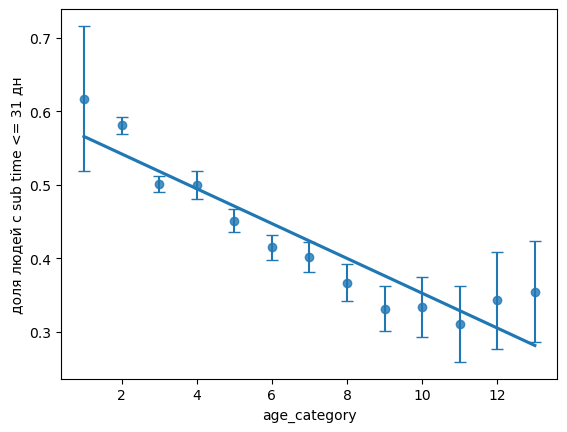

In [41]:
sns.regplot(data=result, x = "age_category", y = "доля людей с sub time <= 31 дн", ci=None)
plt.errorbar(data=result, x = "age_category", y = "доля людей с sub time <= 31 дн", yerr="ci 95p", fmt="none", capsize=4)